### Basic Nerual Network
Followed tutioral from:
https://www.youtube.com/watch?v=VMj-3S1tku0&t=2143s&ab_channel=AndrejKarpathy

In [12]:
#Libraries to be install
import numpy as np
import math
import graphviz as gv
from graphviz import Digraph
import random

# Nerual Network Math #
Derivative: $(f(x+h) - f(x)) \over h$ \
$ tanh (x) =  \frac{e^x-e^{-x}}{e^x+e^{-x}} $ 

In [13]:
class perceptron:
    def __init__(self, x):
        self.value = 0.0 + x
        self.children = []
        self.parents = []

    def add_child(self, child):
        self.children.append(child)
        child.parents.append([self, random.uniform(-1,1)])

In [14]:
class nerualNetwork:
    def __init__(self, numIn, numLayers, numOut, actFunc):
        self.numIn = numIn
        self.numLayers = numLayers 
        self.numOut = numOut
        self.inputs = []
        self.outputs = []
        self.actFunc = actFunc
        self.construct()

    def construct(self):

        def connect(lstOne, lstTwo):
            for node1 in lstOne:
                for node2 in lstTwo:
                    node1.add_child(node2)
            return lstOne
            
        inputs = []
        outputs = []
        layers = []

        # Intilizing the input column
        for i in range(self.numIn):
            input1 = perceptron(0)
            inputs.append(input1)

        # Intilizing the output column
        for i in range(self.numOut):
            output1 = perceptron(0)
            outputs.append(output1)

        if len(self.numLayers) == 0:
            inputs = connect(inputs, outputs)
            self.inputs = inputs
            self.outputs = outputs
        else:
            # Creating the layers
            for i, item in enumerate(self.numLayers):
                lyrIns = []
                for i in range(item):
                    input2 = perceptron(0)
                    lyrIns.append(input2)
                layers.append(lyrIns)
            
            
            # Iterate through the layers in reverse order
            for i in range(len(layers) - 1, -1, -1):
                    
                # If it's the last layer, connect it to the current layer
                if i == len(layers) - 1:
                    current = layers[i]
                    current = connect(current, outputs)
                
                # If it's not the last layer, connect it to the next layer
                else:
                    next_layer = layers[i]
                    next_layer = connect(next_layer, current)
                    current = next_layer

            # Finally, connect the input layer to the current layer
            inputs = connect(inputs, current)
            
            self.inputs = inputs
            self.outputs = outputs

    # x = Value
    # w = Grad
    # y = SUM(x*w)
    # Need to intergrate a Activation Function
    def forwardProp(self, inpts, labels):
        for i in range(len(self.inputs)):
            self.inputs[i].value = inpts[i]
            
        def DFS_forward(node):
            # Get list of the current children
            lstChildren = node.children #[sublist[0] for sublist in node.children]
            # Print the child Val & Grad and decend back down
            for child in lstChildren:
                values = [sublist[0].value for sublist in child.parents]
                weights = [sublist[1] for sublist in child.parents]
                x = np.dot(values, weights)
                if self.actFunc == "Sigmoid": 
                    x = 1 / (1 + np.exp(-x))
                elif self.actFunc == "ReLU":
                    x = np.maximum(0, x)
                elif self.actFunc == "Softplus":
                    x = np.log(1 + np.exp(x))
                child.value = x
                DFS_forward(child)

        for n in self.inputs:
            DFS_forward(n)
        
        return 0

    def backwardProp(self, labels, r):
            
        def DFS_backward(node, label, r, mult):
            # Get list of the current children
            pairsParents = node.parents #[sublist[0] for sublist in node.children]
            # Print the child Val & Grad and decend back down
            for pair in pairsParents:
                newWeight = 0
                a0 = node.value
                a1 = pair[0].value
                w = pair[1]
                if self.actFunc == "Sigmoid": 
                    newWeight = w - r * (a1 * (1 - a1)) * 2 * (a0 - label)
                elif self.actFunc == "ReLU":
                    newWeight = 0
                elif self.actFunc == "Softplus":
                    newWeight = 0

                pair[1] = newWeight
                DFS_backward(pair[0],label,r,mult)

        for node, label in zip(self.outputs, labels):
            DFS_backward(node, label, r, 1.0)

    def train(self, inputs, labels, r):

        for input in inputs:
            acc = self.forwardProp(input, labels)
            self.backwardProp(labels,r)
            print("acc = ")
        

In [15]:
def trace(roots):
    nodes, edges = set(), set()
    visited = set()

    def build(v):
        if v not in visited:
            visited.add(v)
            nodes.add(v)
            for child in reversed(v.children):
                edges.add((child, v))
                build(child)

    for root in roots:
        build(root)

    return nodes, edges

def draw_dot(roots):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right

    nodes, edges = trace(roots)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="value: %.4f" % (n.value), shape='circle', width='1.0', height='1.0')
    x = 1
    for n1, n2 in edges:
        
        # connect n1 to n2
        weights1 = [sublist[1] for sublist in n1.parents]
        nodeP1 = [sublist[0] for sublist in n1.parents]
        weight = 0
        for index, parent in enumerate(nodeP1):
            if parent == n2:
                weight = weights1[index]

        edge_label = "w: %.4f" % weight
        dot.edge(str(id(n2)), str(id(n1)), label=edge_label)
        x+=1

    return dot

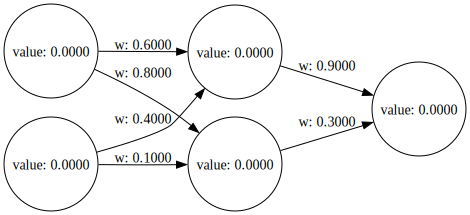

In [16]:
#         (#Inputs, #HiddenLayersDim, #Outputs)
NN = nerualNetwork(2,[2],1,"Sigmoid")
x = 0.8
NN.inputs[0].children[0].parents[0][1] = 0.1
NN.inputs[0].children[0].parents[1][1] = 0.8
NN.inputs[0].children[1].parents[0][1] = 0.4
NN.inputs[0].children[1].parents[1][1] = 0.6
NN.inputs[0].children[0].children[0].parents[0][1] = 0.3
NN.inputs[0].children[0].children[0].parents[1][1] = 0.9
draw_dot(NN.inputs)



0


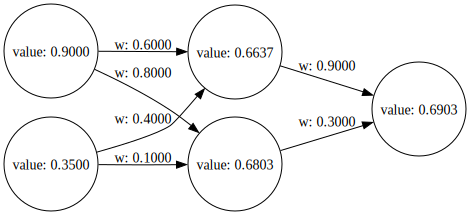

In [17]:
print(NN.forwardProp([0.35,0.9],[0.687]))
draw_dot(NN.inputs)

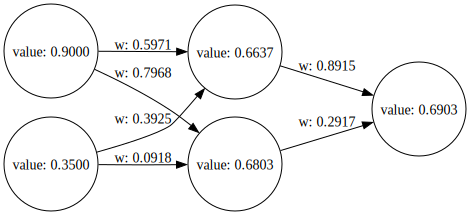

In [18]:
NN.backwardProp([0.5],0.1)
draw_dot(NN.inputs)

In [ ]:
NN.train()

# Backpropgation #
Cost Function: $ C(a) = (a-y)^2 $ \
Dir.: $\frac{\partial C}{\partial a}=2(a-y)$ \
$a(\omega) = i\cdot\omega$ \
$\frac{\partial a}{\partial \omega}=i$ \
Dir.: $\frac{\partial C}{\partial \omega}=\frac{\partial a}{\partial \omega} \frac{\partial C}{\partial a}$ \


